# Polynomial Linear Regression

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [5]:
#Convert CSV file to a pandas DataFrame object

In [14]:
data=pd.read_csv("C:/Users/Mestan/Desktop/Python/database/rank_salary.csv")

In [ ]:
#To preserve the original data set, we obtain a copy

In [15]:
df=data.copy()

In [88]:
df

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [ ]:
#Data set visualization function

In [95]:
def visualize(x,y,labelScatter,labelPlot,title):
    plt.scatter(df[x],df[y],label=labelScatter)
    plt.plot(df[x],df[y],color="green",label=labelPlot)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.ticklabel_format(style='plain', axis='both')
    plt.legend()
    plt.show()   

In [96]:
#Visualize the dataset

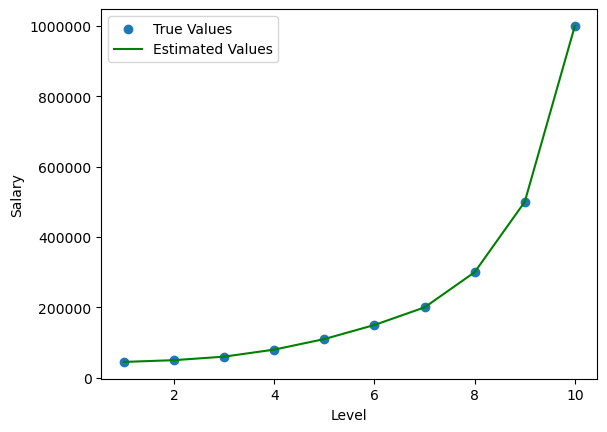

In [97]:
visualize("Level","Salary","True Values","Estimated Values","Rank Salary") 

In [102]:
#A feature object with polynomial degree 2 using the PolynomialFeatures class
#Feature Vector=[1,x,x^2]

In [157]:
poly = PolynomialFeatures(degree=2)

In [158]:
#learning and transformation processes

In [159]:
x_poly=poly.fit_transform(df[["Level"]])

In [160]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [161]:
#Creating an object from the LinearRegression class

In [162]:
regression=LinearRegression()

In [163]:
#training linear regression model

In [164]:
regression.fit(x_poly,df["Salary"])

LinearRegression()

In [165]:
#Predictions on feature vectors (x_poly) using trained linear regression model

In [166]:
y_head=regression.predict(x_poly)

In [167]:
#Visualization of predictions made by real data and linear regression model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


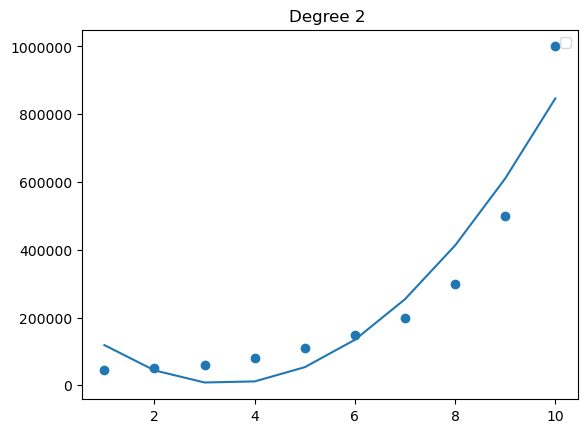

In [168]:
plt.scatter(df["Level"],df["Salary"])
plt.title("Degree 2 ")
plt.plot(df["Level"],y_head)
plt.ticklabel_format(style='plain', axis='both')
plt.legend()
plt.show()  

In [204]:
#Test

In [205]:
x=poly.fit_transform([[4.5]])
regression.predict(x)

array([27740.53030303])

In [169]:
#Let's make the code functional

In [200]:
def visualizeModel(x,y,title,newHead):
    plt.scatter(df[x],df[y],label="True Values")
    plt.title("Degreee "+str(title))
    plt.plot(df[x],newHead,color="red",label="Guess Price")
    plt.ticklabel_format(style='plain', axis='both')
    plt.xlabel("Level")
    plt.ylabel("Guess Price")
    plt.legend()
    plt.show() 

In [209]:
def modelT(d):
    poly_ = PolynomialFeatures(degree=d)
    x_poly_=poly_.fit_transform(df[["Level"]])
    regression_=LinearRegression()
    regression_.fit(x_poly_,df["Salary"])
    y_head_=regression_.predict(x_poly_)
    x=poly_.fit_transform([[4.5]])
    print("Guess:")
    print((regression_.predict(x)))
    visualizeModel("Level","Salary",d,y_head_)
    

In [210]:
#Degreee 2 ,Degreee 3, Degreee 4,Degreee 5

Guess:
[27740.53030303]


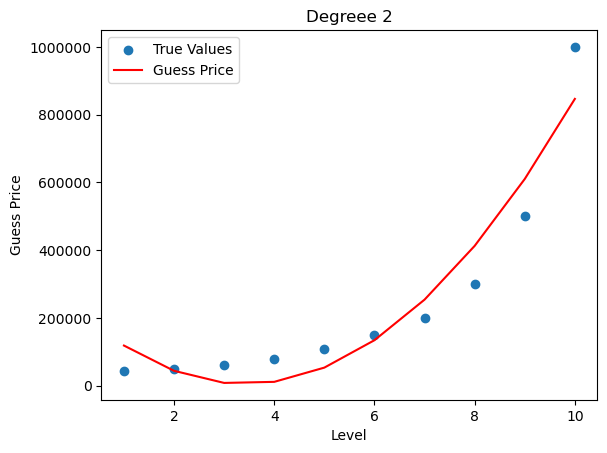

Guess:
[83979.16666666]


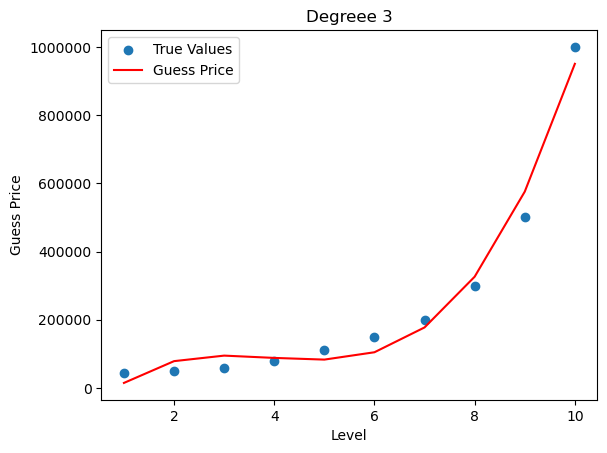

Guess:
[109582.14962124]


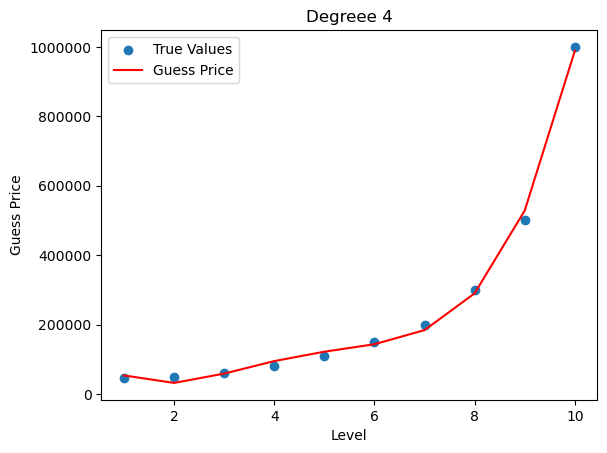

Guess:
[93566.52462091]


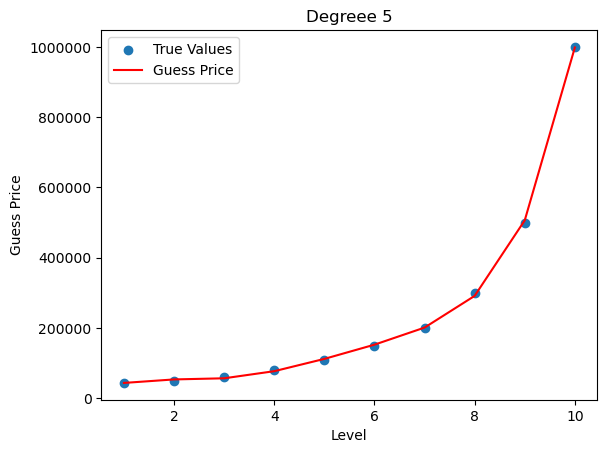

In [216]:
for i in range(2,6):
    modelT(i)